In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.metrics import mean_squared_error as mse_calc, mean_absolute_error as mae_calc # type: ignore
from sklearn.datasets import make_regression # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [7]:
# Generate synthetic regression data
X_data, y_data = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [8]:
# Simulate predictions with different noise levels
y_predicted_mse = y_train + np.random.normal(scale=5, size=len(y_train))
y_predicted_mae = y_train + np.random.normal(scale=10, size=len(y_train))

In [9]:
# Compute and display the errors
mse_value = mse_calc(y_train, y_predicted_mse)
mae_value = mae_calc(y_train, y_predicted_mae)

In [10]:
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")

Mean Squared Error (MSE): 24.1357
Mean Absolute Error (MAE): 8.6822


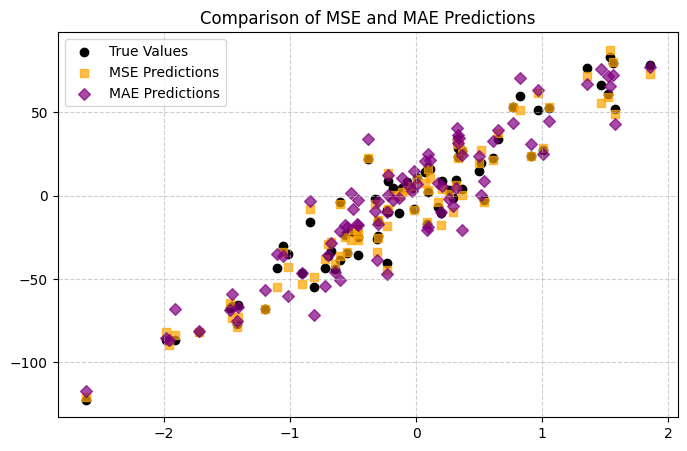

In [12]:
# Visualize MSE and MAE predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='True Values', color='black', marker='o')
plt.scatter(X_train, y_predicted_mse, label='MSE Predictions', color='orange', alpha=0.7, marker='s')
plt.scatter(X_train, y_predicted_mae, label='MAE Predictions', color='purple', alpha=0.7, marker='D')
plt.legend()
plt.title("Comparison of MSE and MAE Predictions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [ ]:
from sklearn.linear_model import HuberRegressor # type: ignore
from sklearn.metrics import mean_squared_error as mse_calc # type: ignore

# Assuming X_train and y_train are already defined and contain your data

# Huber Loss Example
huber_regressor = HuberRegressor(epsilon=1.0)
huber_regressor.fit(X_train, y_train)  # Fit the model to the training data
y_pred_huber = huber_regressor.predict(X_train)  # Make predictions

# Calculate Mean Squared Error (MSE) as an evaluation metric
huber_loss = mse_calc(y_train, y_pred_huber)

# Print the calculated loss
print(f"Huber Loss (as MSE): {huber_loss:.4f}")


Huber Loss (as MSE): 164.3102


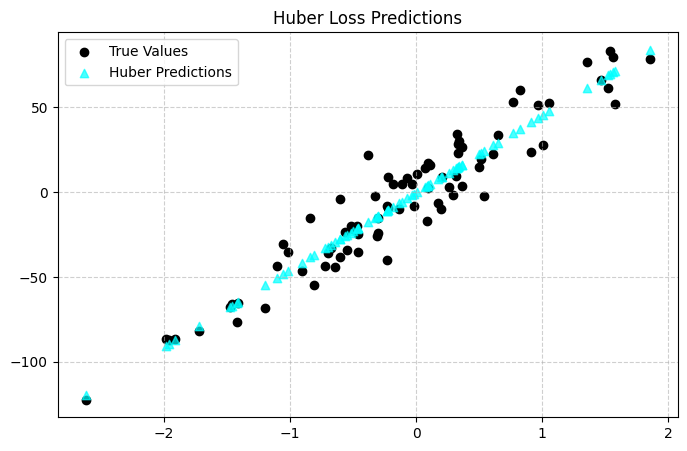

In [15]:
# Visualize Huber Loss Predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='True Values', color='black', marker='o')
plt.scatter(X_train, y_pred_huber, label='Huber Predictions', color='cyan', alpha=0.7, marker='^')
plt.legend()
plt.title("Huber Loss Predictions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification  # Import this function
from sklearn.model_selection import train_test_split

# Generate sample classification data
X_classification, y_classification = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [18]:
# Log Loss Example
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_cls, y_train_cls)
log_loss_value = log_loss(y_train_cls, logistic_regressor.predict_proba(X_train_cls))
print(f"Log Loss: {log_loss_value:.4f}")

Log Loss: 0.1010


In [19]:
# Hinge Loss Example (for SVM)
y_train_hinge = np.where(y_train_cls == 0, -1, 1)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_cls, y_train_hinge)
hinge_loss = np.mean(np.maximum(0, 1 - y_train_hinge * svm_classifier.decision_function(X_train_cls)))
print(f"Hinge Loss: {hinge_loss:.4f}")

Hinge Loss: 0.0643


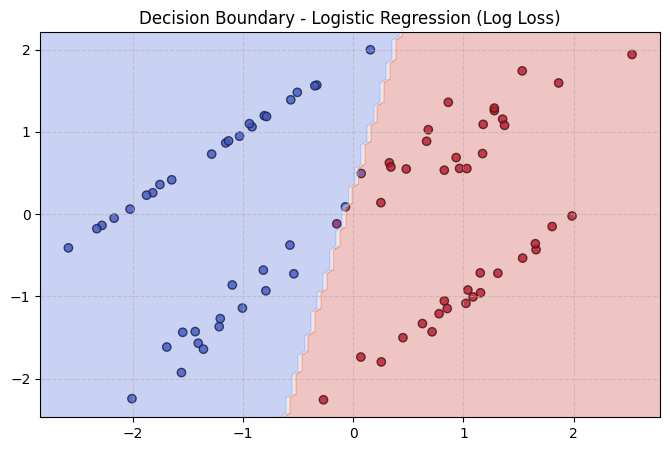

In [20]:
# Decision boundary visualization for Log Loss (Logistic Regression)
plt.figure(figsize=(8, 5))
plt.scatter(X_train_cls[:, 0], X_train_cls[:, 1], c=y_train_cls, cmap='coolwarm', alpha=0.8, edgecolors='k')
xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Decision Boundary - Logistic Regression (Log Loss)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

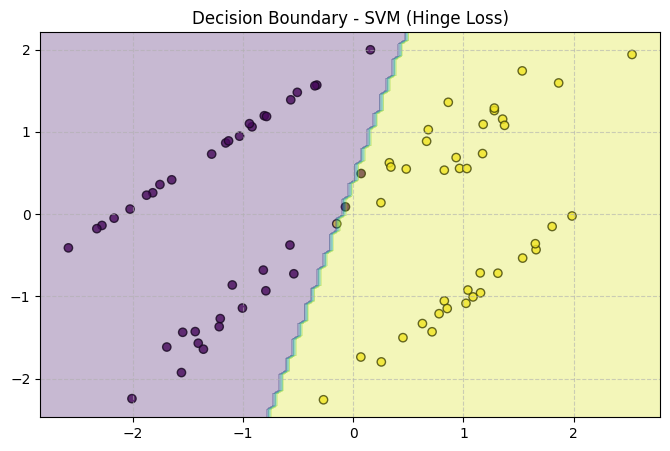

In [21]:
# Decision boundary visualization for Hinge Loss (SVM)
plt.figure(figsize=(8, 5))
plt.scatter(X_train_cls[:, 0], X_train_cls[:, 1], c=y_train_hinge, cmap='viridis', alpha=0.8, edgecolors='k')
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title("Decision Boundary - SVM (Hinge Loss)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()